In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/Users/macbookair/Desktop/Machine Learning/Feature_Scaling/Standardization/placement (1).csv')

In [3]:
df.sample(5)

,Unnamed: 0,cgpa,iq,placement
10,10,6.0,45.0,1
80,80,4.9,196.0,0
28,28,5.2,90.0,0
20,20,6.6,120.0,1
32,32,7.0,139.0,1


In [4]:
df = df.iloc[:, 1:]

In [5]:
df.sample(5)

,cgpa,iq,placement
96,4.4,42.0,0
45,6.0,66.0,1
70,6.3,127.0,1
77,7.3,50.0,1
66,6.9,96.0,1


# Train test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('placement',axis=1), df['placement'], test_size=0.3, random_state=0)

In [8]:
X_test.shape,X_test.shape

((30, 2), (30, 2))

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train

,cgpa,iq
60,6.9,139.0
80,4.9,196.0
90,7.3,86.0
68,4.0,75.0
51,4.8,141.0
...,...,...
96,4.4,42.0
67,5.0,118.0
64,7.0,64.0
47,5.2,161.0


In [11]:
X_test

,cgpa,iq
26,7.0,199.0
86,5.1,128.0
2,5.3,121.0
55,7.8,114.0
75,4.8,169.0
93,6.8,112.0
16,5.2,224.0
73,4.9,61.0
54,6.4,141.0
95,4.3,200.0


In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=df.drop('placement', axis=1).columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=df.drop('placement', axis=1).columns)


In [13]:
np.round(X_train_scaled.describe(), 1)

,cgpa,iq
count,70.0,70.0
mean,-0.0,0.0
std,1.0,1.0
min,-2.2,-2.0
25%,-0.8,-0.8
50%,0.0,0.1
75%,0.8,0.7
max,2.1,2.9


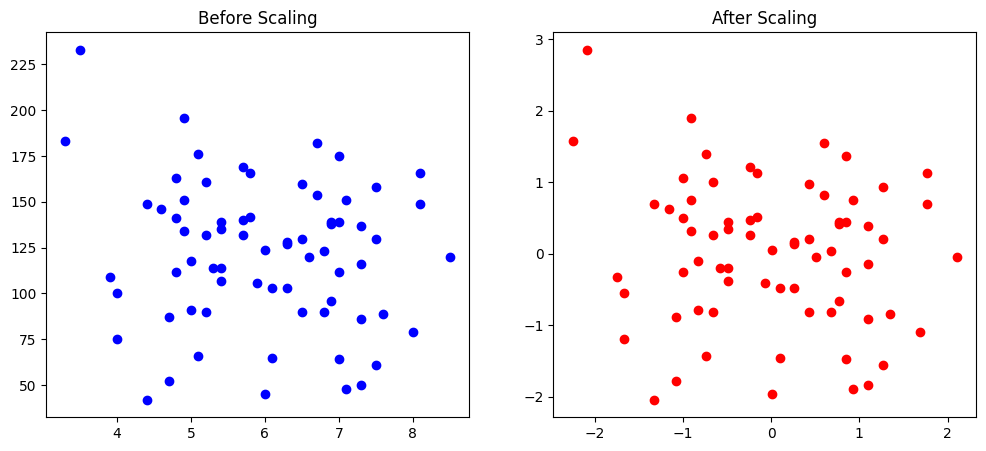

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['cgpa'], X_train['iq'],color='blue')
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['cgpa'], X_train_scaled['iq'],color='red')
ax2.set_title("After Scaling")
plt.show()

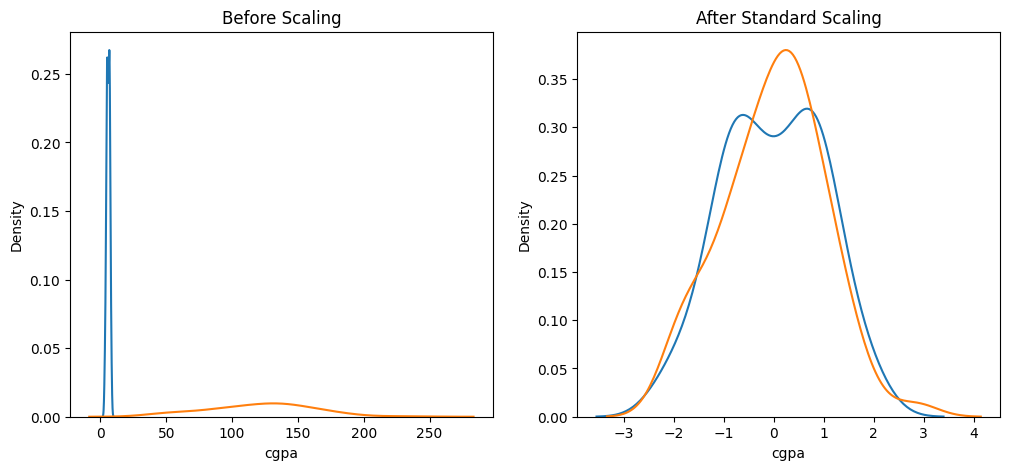

In [45]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['cgpa'], ax=ax1)
sns.kdeplot(X_train['iq'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['cgpa'], ax=ax2)
sns.kdeplot(X_train_scaled['iq'], ax=ax2)
plt.show()

# Comparison of distribution

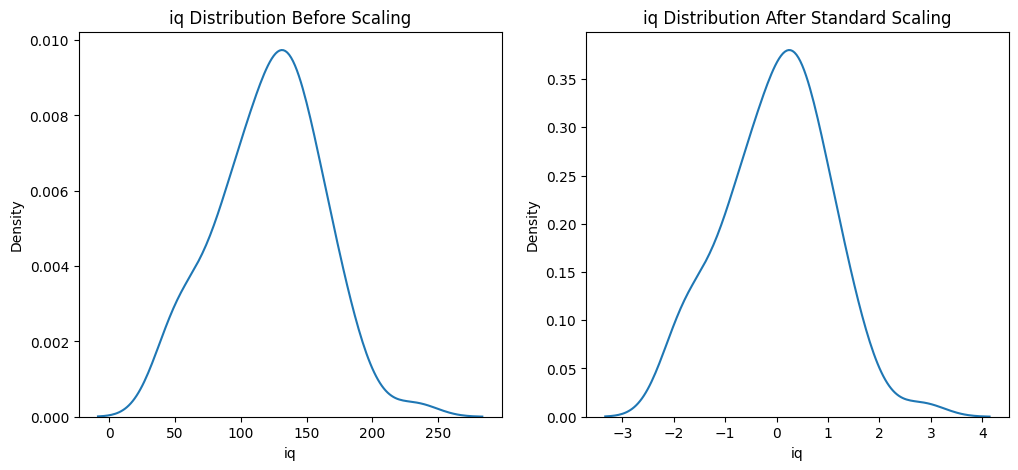

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('iq Distribution Before Scaling')
sns.kdeplot(X_train['iq'], ax=ax1)

# after scaling
ax2.set_title('iq Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['iq'], ax=ax2)
plt.show()

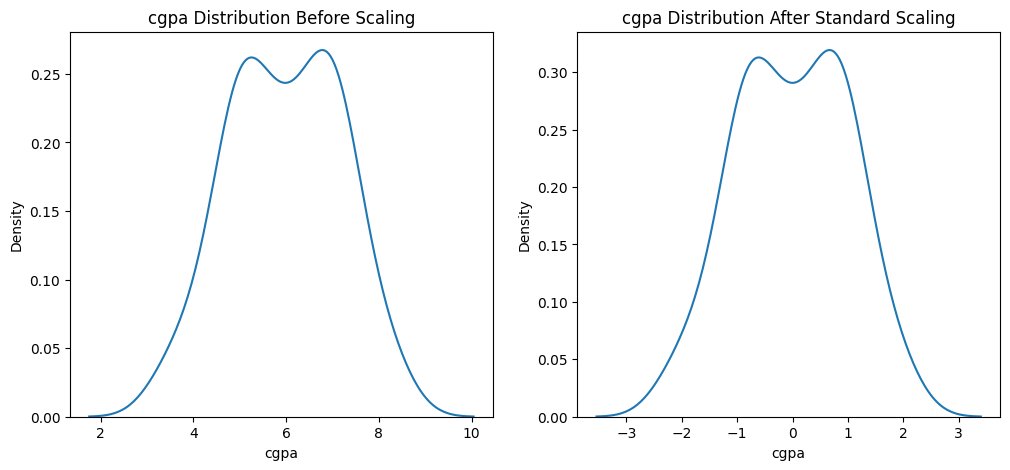

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('cgpa Distribution Before Scaling')
sns.kdeplot(X_train['cgpa'], ax=ax1)

# after scaling
ax2.set_title('cgpa Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['cgpa'], ax=ax2)
plt.show()

# Why scaling is important

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()


In [20]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [21]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print("Accuracy without Scaling: ", accuracy_score(y_test, y_pred))
print("Accuracy with Standard Scaling: ", accuracy_score(y_test, y_pred_scaled))

Accuracy without Scaling:  0.8333333333333334
Accuracy with Standard Scaling:  0.8666666666666667
